<a href="https://colab.research.google.com/github/simoneminorr/knn_assignment/blob/main/assignment_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


In [3]:
! git clone https://github.com/ds3001f25/knn_assignment.git

Cloning into 'knn_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 7 (from 1)
Receiving objects: 100% (9/9), 854.33 KiB | 10.29 MiB/s, done.


In [4]:
cd knn_assignment

/content/knn_assignment


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. What is the difference between regression and classification?

A: The difference between regression and classification is regression predicts continous numerical values and classification predicts discrete categories or labels which means the difference is in the output they predict.

2. What is a confusion table? What does it help us understand about a model's performance?

A: A confusion table is a summary table that analyzes the break down of ground truth instances of a class against the predicted class instances. Confusion tables help us evaluate a model's performance.

3. What does the SSE quantify about a particular model?


A: SSE quantifies the unexplained variation/random error in a dataset about a particular model by measuring the difference between observed and oreducted values.

4. What are overfitting and underfitting?

A: Overfitting is when a model is almost too well trained that it does not intake and model new data well. Underfitting is when the model is too simple and does not grasp the essential patterns and such in the data it was trained on and as a result there is bad performance in the model on the training data as well as new data.

5. Why does splitting the data into training and testing sets, and choosing  𝑘  by evaluating accuracy or SSE on the test set, improve model performance?

A: Splitting the data into training and testing sets, as well as choosing k by evaluating accuracy of SSE on the test set, improves the mode performance. Using two different data sets for training and testing the data is good to evaluate the performance of model to generalize new data and allows us to see if any over- or underfitting is occurring. Choosing k by evaluating accuracy or SSE on the test set ensures that the model works well on unseen data which rules out overfitting. Overall these things allow for a better evaluation of the model in an unbiased way.

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

A: The strengths of class labels are in the clear and easy to comprehend decision from discretes. The weaknesses of class label as prediction are that uncertainties are not communicated in discrete and it requires adjusting threshold for decision-making.
The strengths of probability distribution as a prediction are the inverse of class labels in the way that there is detailed uncertainty information as well as flexible thresholds for decision making. Anoother pro for probabilities is that you can combine multiple classifiers in these mdoels. The weaknesses are these are not as clear and it requires more effort and if it is not calibrated properly this leads to inaccurate probabilities and predictions.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

1. Load the ./data/USA_cars_datasets.csv. Keep the following variables and drop the rest: price, year, mileage. Are there any NA's to handle? Look at the head and dimensions of the data.

In [6]:
cars = pd.read_csv('./data/USA_cars_datasets.csv')
cars.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [7]:
#dropping other columns
cars_dropped = cars.drop(columns=['Unnamed: 0','brand', 'model', 'title_status','color','vin','lot','state','country','condition'])
cars_dropped.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [8]:
#checking for NAs
cars_price_na = cars_dropped['price'].isnull().any()
print(f'There are {cars_price_na} NAs in price')
cars_year_na = cars_dropped['year'].isnull().any()
print(f'There are {cars_year_na} NAs in year')
cars_mileage_na = cars_dropped['mileage'].isnull().any()
print(f'There are {cars_mileage_na} NAs in mileage')

#There are no NAs in any of the columns

There are False NAs in price
There are False NAs in year
There are False NAs in mileage


In [9]:
#checking dimensions of dropped dataset
cars_dropped.shape

#there are 2499 observations and and 3 variables so the dimensions are 2499 x 3

(2499, 3)

2. Maxmin normalize year and mileage.

In [10]:
def maxmin(z):
    w = (z-np.min(z))/(np.max(z)-np.min(z))
    return w

cars_dropped['year'] = maxmin(cars_dropped['year'])
cars_dropped['mileage'] = maxmin(cars_dropped['mileage'])

cars_dropped.head()

,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


3. Split the sample into ~80% for training and ~20% for evaluation.

In [13]:
y = cars_dropped['price'] # Create target variable vector
X = cars_dropped.loc[:,['year','mileage']] # Create feature matrix
X = X.apply(maxmin) # Normalize X

# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

4. Use the  𝑘 NN algorithm and the training data to predict price using year and mileage for the test set for  𝑘=3,10,25,50,100,300 . For each value of  𝑘 , compute the mean squared error and print a scatterplot showing the test value

In [14]:
def knn_reg(x_hat,gdf,K):
    # Compute distances between x_hat and the data:
    squared_differences = (x_hat - gdf.loc[:,['x1','x2']])**2
    distances = np.sum( squared_differences , axis = 1)
    # Find k smallest values in dist:
    neighbors = np.argsort(distances)[:K].tolist()
    # Find y values for the nearest neighbors:
    y_star = gdf['y'].iloc[neighbors].tolist()
    # Average neighbor values to get prediction:
    y_hat = np.mean(y_star)
    # Return a dictionary of computed values of interest:
    return {'y_hat':y_hat, 'y_star':y_star, 'neighbors':neighbors}

In [16]:
# Cleaning the data
carsdroppeddf = cars_dropped.loc[:,['year', 'mileage',  'price',]]
carsdroppeddf = carsdroppeddf.rename(columns={'year':'x1', 'mileage':'x2', 'price':'y'})

def maxmin(z):
    w = (z-np.min(z))/(np.max(z)-np.min(z))
    return w

carsdroppeddf['x1'] = maxmin(carsdroppeddf['x1'])
carsdroppeddf['x2'] = maxmin(carsdroppeddf['x2'])
carsdroppeddf['y'] = maxmin(carsdroppeddf['y'])

carsdroppeddf.head()

,x1,x2,y
0,0.744681,0.269287,0.074205
1,0.808511,0.187194,0.034146
2,0.957447,0.038892,0.063015
3,0.872340,0.063016,0.294464
4,0.957447,0.006537,0.326266


In [18]:
def maxmin(z):
    w = (z-np.min(z))/(np.max(z)-np.min(z))
    return w

carsdroppeddf['x1'] = maxmin(carsdroppeddf['x1'])
carsdroppeddf['x2'] = maxmin(carsdroppeddf['x2'])
carsdroppeddf['y'] = maxmin(carsdroppeddf['y'])

carsdroppeddf.head()

,x1,x2,y
0,0.744681,0.269287,0.074205
1,0.808511,0.187194,0.034146
2,0.957447,0.038892,0.063015
3,0.872340,0.063016,0.294464
4,0.957447,0.006537,0.326266


{'y_hat': np.float64(9.815469179426775e-05), 'y_star': [0.0002944640753828033, 0.0, 0.0], 'neighbors': [362, 410, 496]}


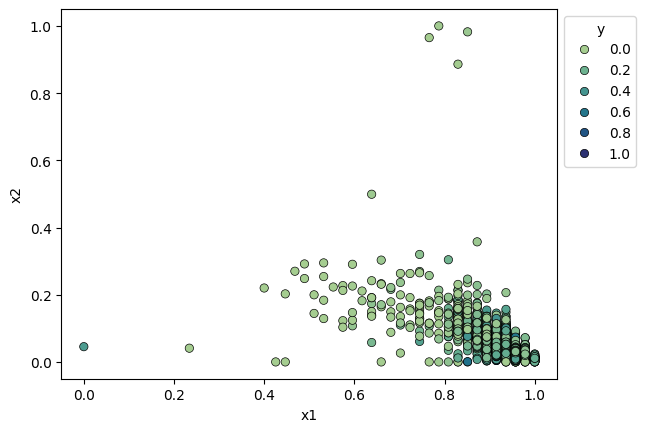

In [22]:
x_hat = np.array((.4,.22)) # Example prediction case
knn = knn_reg(x_hat, carsdroppeddf, 3) # Call our function
print(knn)

# Plot results:
carsdroppeddf2 = carsdroppeddf.copy()
hat_row = [ x_hat[0], x_hat[1],knn['y_hat'],'hat']
carsdroppeddf2.loc[len(carsdroppeddf2)] = hat_row
this_plot = sns.scatterplot(data=carsdroppeddf2,x='x1',y='x2',hue='y',palette='crest',edgecolor='black') # Plot the fake data
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

MSE for k=3: 133487993.49644443


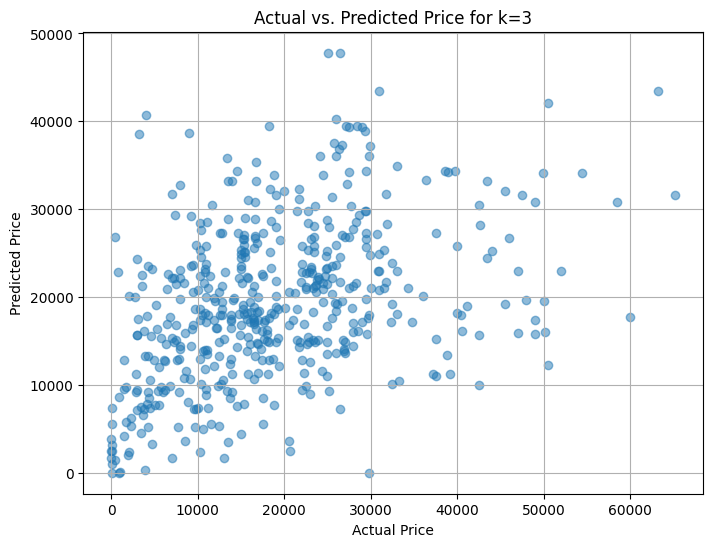

MSE for k=10: 111588702.61873999


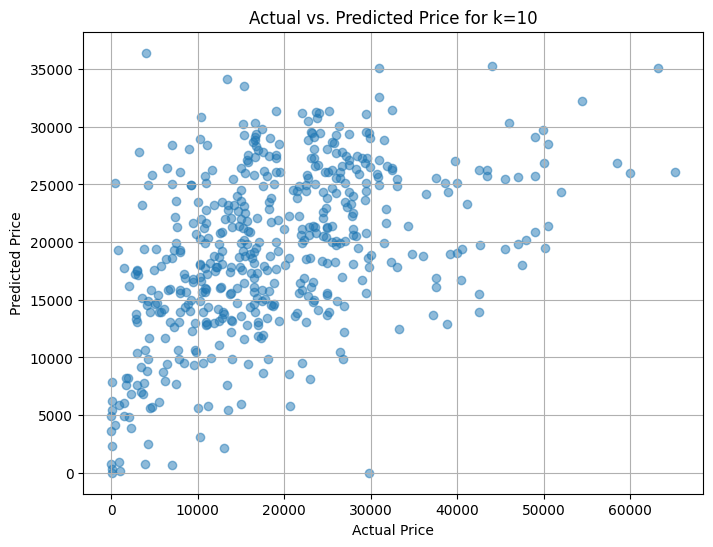

MSE for k=25: 104962784.87012799


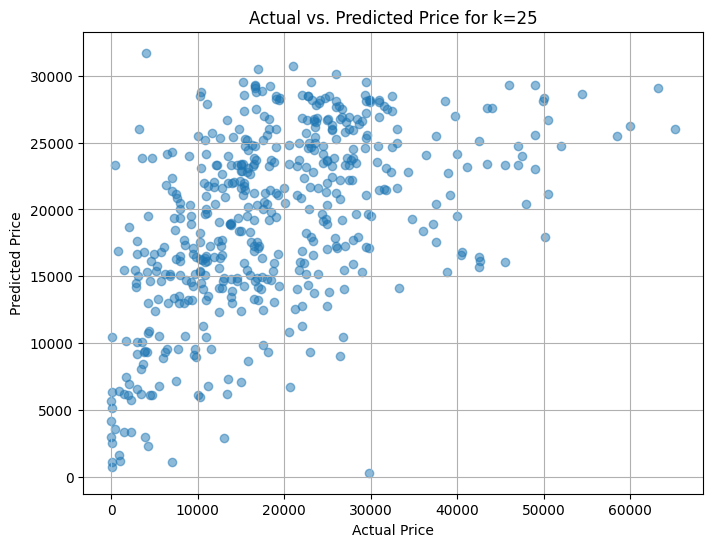

MSE for k=50: 103873193.2199608


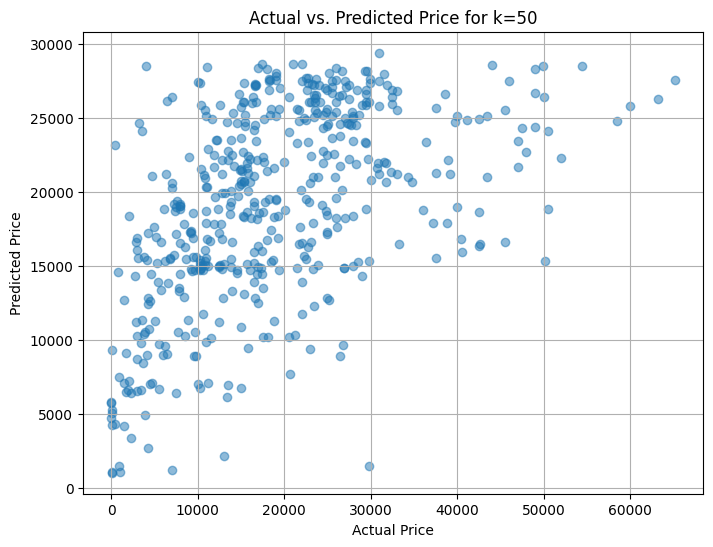

MSE for k=100: 104534999.25921261


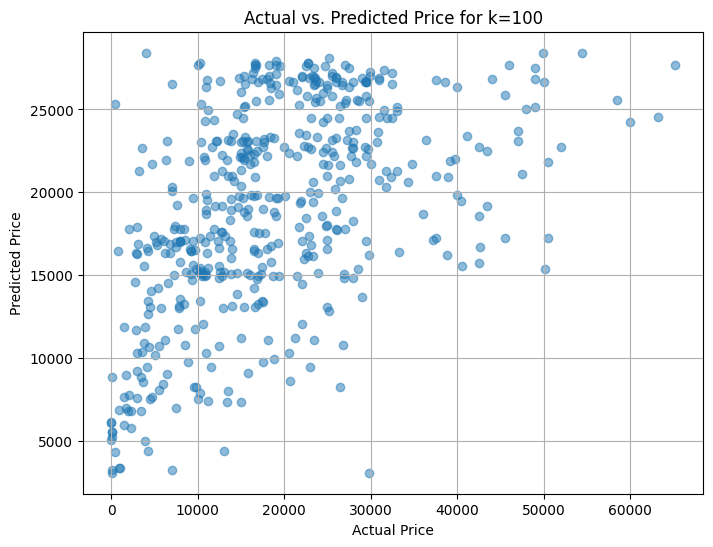

MSE for k=300: 107657680.73624039


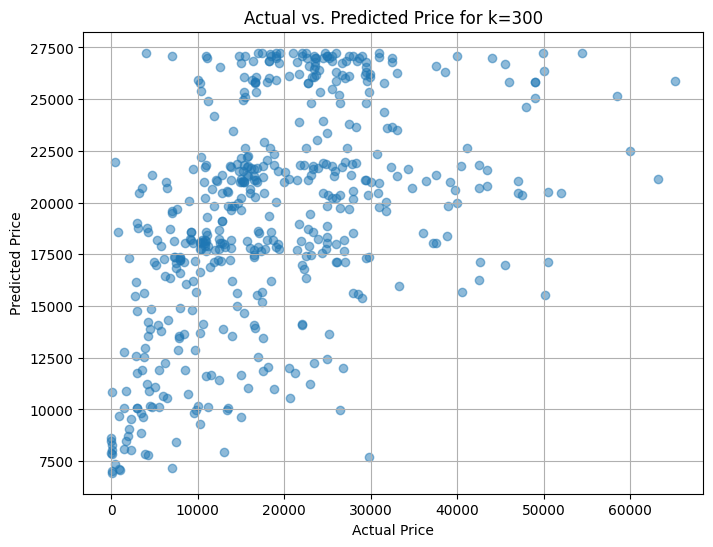

In [26]:
k_values = [3, 10, 25, 50, 100, 300]
mse_values = []

for k in k_values:
    # Fitting model
    model = KNeighborsRegressor(n_neighbors=k)
    # Train the model on 80% data
    fitted_model = model.fit(X_train, y_train)
    # Predict values for test dataset
    y_hat = fitted_model.predict(X_test)

    # Compute the mean squared error (MSE)
    mse = mean_squared_error(y_test, y_hat)
    mse_values.append(mse)
    print(f'MSE for k={k}: {mse}')

    # Plot test value against predicted value in a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_hat, alpha=0.5)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"Actual vs. Predicted Price for k={k}")
    plt.grid(True)
    plt.show()

5. Determine the optimal  𝑘  for these data.

In [29]:
k_bar = 300 # Number of k's to try
SSE = [] # We'll store the SSE here
SSE_on_train = [] # For pedogogical purposes, we'll save the training error

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE.append(np.sum( (y_test-y_hat)**2 )) # Save the computed SSE for test set
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_on_train.append( np.sum( (y_train-y_hat)**2 ) ) # Save the computed SSE

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)

[28]


In [31]:
# Find the index of the minimum MSE
min_mse_index = mse_values.index(min(mse_values))

# Finding the optimal k value
optimal_kvalue = k_values[min_mse_index]

#Printing out optimal k value out of options given
print(f"The optimal k from the set {k_values} is: {optimal_kvalue} with an MSE of {min(mse_values)}")

The optimal k from the set [3, 10, 25, 50, 100, 300] is: 50 with an MSE of 103873193.2199608


6. Describe what happened in the plots of predicted versus actual prices as  𝑘  varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

lower level k values (3 and 10): the scatterplot is more sporadic and cluttered withno real trend because the lower the k, the more flexible the model. In other words, this model is more complex and in this case overly sensitive to variations in actual and predicted price which is causing overfitting. These values do not generalize well.

mid level k values (25,50,100): these mid level k values seems to meet in the middle of the impacts of extreme k values. The trends seem to appear more smooth and visualize the trend better. Here we see the points at almost an angle. This explains why 50 was the optimal k because it was a happy medium of sensitivity and generalization.

higher level k values (300): with a higher k value leads to underfitting which is why we see these pronounced lines in the scatterplot. It seems as though the model is not taking in the patterns of the training data because it is too well trained on the old data.

**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.